<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='15'><b> Machine Learning - Feature Preprocessing/Engineering </b></font> <br><p><font color='#559E54' size='6'>(Intructor Copy)</font></p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'>

---


<br>

### Table of Content  
[1. Categorical Feature Engineering](#section1)
  - [Nominal Categorical](#section1.1)
    - [LabelEncoder](#section1.1.1)
    - [OneHotEncoding](#section1.1.2)
    - [GetDummies](#section1.1.3)
  - [Ordinal Categorical](#section1.2)  
  - [Bin Counting](#section1.3)  
  - [Feature Hashing](#section1.4)    

[2. Numerical Feature Engineering](#section2)
  - [Missing Imputation](#section2.1)
  - [Binarization](#section2.2)
  - [Binning](#section2.3)
  - [Log Transformation](#section2.4)
  
[3. Feature Scaling](#section3)
  - [Feature Scaling](#section3.1)
  - [Feature Scaling Impact on PCA](#section3.2)
 
[4. Polynomials](#section4)

# <a name="section1"></a> <font color='#347B98'> 1. Feature Engineering - Categorical Features

**Referece**
> Sklearn Preprocessing Package Documentation [link](http://scikit-learn.org/stable/modules/preprocessing.html)

Typically, any data attribute which is categorical in nature represents discrete values which belong to a specific finite set of categories or classes. These are also often known as **`classes`** or **`labels`** in the context of attributes or variables which are to be predicted by a model (popularly known as response variables). These discrete values can be text or numeric in nature (or even unstructured data like images!). 

There are two major classes of categorical data, 
> - nominal,   
> - ordinal  

### $\delta$ Nominal categorical data 
There is no concept of ordering amongst the values of that attribute. 

Consider a simple example of weather categories, as depicted in the following figure. We can see that we have six major classes or categories in this particular scenario without any concept or notion of order: `sunny| cloudy | snowy | windy | icy | rainy`

Some examples of nominal variables:
- gender
- age
- postal code
- country/city
- music genres
- restaurant types
- bank account types
- customer segments
- etc.

### $\delta$ Ordinal categorical data 

Ordinal categorical attributes have some sense or notion of order amongst its values. For instance look at the following figure for shirt sizes. It is quite evident that order or in this case ‘size’ matters when thinking about shirts (S is smaller than M which is smaller than L and so on).

Some examples of ordinal variables:
- Shoe sizes
- education level 
- employment roles 
- income level



## <a name="section1.1"></a> $\Delta$ 1.1 Nominal Categorical Variable

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

vgsales = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/vgsales.csv', encoding='utf-8') # video games sales dataset

vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
# list of categorical variables
catvars = ['Name', 'Platform', 'Year', 'Genre', 'Publisher']

vgsales[catvars].head(5)

,Name,Platform,Year,Genre,Publisher
0,Wii Sports,Wii,2006.0,Sports,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo


### <a name="section1.1.1"></a>  $\delta$ 1.1.1 `sklearn.preprocessing.LabelEncoder`
`LabelEncoder` can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

So why do we still need LabelEncoder still? 
> In Sklearn, OneHotEncoder will only work on integer categorical values, so if you have strings in your categorical columns, you need to use LabelEncoder to convert them first!

In [3]:
# video game genres is a nominal categorical variable
genres = np.unique(vgsales['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

It tells us that we have 12 distinct video game genres. We can now generate a label encoding scheme for mapping each category to a numeric value

In [4]:
# use LabelEncoder to encode genres
from sklearn.preprocessing import LabelEncoder

genre_le = LabelEncoder()
genre_labels = genre_le.fit_transform(vgsales['Genre'])
genre_labels

array([10,  4,  6, ...,  6,  5,  4])

In [5]:
genre_le.classes_

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [6]:
genre_mappings = {index: label for index, label in enumerate(genre_le.classes_)}
genre_mappings

{0: 'Action',
 1: 'Adventure',
 2: 'Fighting',
 3: 'Misc',
 4: 'Platform',
 5: 'Puzzle',
 6: 'Racing',
 7: 'Role-Playing',
 8: 'Shooter',
 9: 'Simulation',
 10: 'Sports',
 11: 'Strategy'}

Thus a mapping scheme has been generated where each genre value is mapped to a number with the help of the LabelEncoder object `genres_le`. The transformed labels are stored in the genre_labels value which we can write back to our data frame.

In [7]:
# complete the encoding and add the derived variable back to dataframe
vgsales['GenreLabel'] = genre_labels
vgsales[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].head()

,Name,Platform,Year,Genre,GenreLabel
0,Wii Sports,Wii,2006.0,Sports,10
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7


The derived labels can be used directly often especially with frameworks like scikit-learn if you plan to use them as response variables for prediction. 

### <a name="section1.1.2"></a>  $\delta$ 1.1.2 `sklearn.preprocessing.OneHotEnoder`

Considering we have the numeric representation of any categorical attribute with m labels (after transformation), the one-hot encoding scheme, encodes or transforms the attribute into m binary features which can only contain a value of 1 or 0. Each observation in the categorical feature is thus converted into a vector of size m with only one of the values as 1 (indicating it as active)

Compared to LabelEncoder, One-Hot-Encoding has a the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. 

**Disadvantage of OneHotEcoder**
- The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the **curse of dimensionality**. 
> In these cases, we can employ one-hot-encoding followed by **PCA for dimensionality reduction**. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature.

**NOTE**:
- If your categorical variable has string as the values, then you need to run LabelEncoder first before fit with OneHotEncoder becasue in Sklearn, OHE only takes numeric values

### Load Dataset

In [9]:
# Load the pokemon dataset
poke_df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/Pokemon.csv', encoding='utf-8')

poke_catvars = ['Name', 'Generation', 'Legendary']
poke_df[poke_catvars].iloc[4:10]


,Name,Generation,Legendary
4,Charmander,Gen 1,False
5,Charmeleon,Gen 1,False
6,Charizard,Gen 1,False
7,CharizardMega Charizard X,Gen 1,False
8,CharizardMega Charizard Y,Gen 1,False
9,Squirtle,Gen 1,False


### LabelEncoder - Categorical Variables with String Values

The attributes of interest are Pokémon `Generation` and their `Legendary` status. The first step is to transform these attributes into numeric representations using LabelEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# transform and map pokemon generations
generation_le = LabelEncoder()
generation_labels = generation_le.fit_transform(poke_df['Generation'])
poke_df['Gen_Label'] = generation_labels

# transform and map pokemon legendary status
legendary_le = LabelEncoder()
legendary_labels = legendary_le.fit_transform(poke_df['Legendary'])
poke_df['Lgnd_Label'] = legendary_labels

In [11]:
poke_df_catvars = poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]
poke_df_catvars.iloc[4:10]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
4,Charmander,Gen 1,0,False,0
5,Charmeleon,Gen 1,0,False,0
6,Charizard,Gen 1,0,False,0
7,CharizardMega Charizard X,Gen 1,0,False,0
8,CharizardMega Charizard Y,Gen 1,0,False,0
9,Squirtle,Gen 1,0,False,0


### OHE (One-Hot-Encoding)

In [12]:
# encode generation labels using one-hot encoding scheme
generation_ohe = OneHotEncoder()
generation_feature_arr = generation_ohe.fit_transform(poke_df[['Gen_Label']]).toarray()
generation_feature_labels = list(generation_le.classes_)
generation_features = pd.DataFrame(generation_feature_arr, columns=generation_feature_labels)

In [13]:
# encode legendary status labels using one-hot encoding scheme
legendary_ohe = OneHotEncoder()
legendary_feature_arr = legendary_ohe.fit_transform(poke_df[['Lgnd_Label']]).toarray()
legendary_feature_labels = ['Legendary_'+str(cls_label) for cls_label in legendary_le.classes_]
legendary_features = pd.DataFrame(legendary_feature_arr, columns=legendary_feature_labels)

### Merge Encoded Features

In [14]:
poke_df_ohe = pd.concat([poke_df_catvars, generation_features, legendary_features], axis=1)
poke_df_ohe.head()

,Name,Generation,Gen_Label,Legendary,Lgnd_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary_False,Legendary_True
0,Bulbasaur,Gen 1,0,False,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Ivysaur,Gen 1,0,False,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Venusaur,Gen 1,0,False,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,VenusaurMega Venusaur,Gen 1,0,False,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Charmander,Gen 1,0,False,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Applying OHE to New Data Points
Consider you built this encoding scheme on your training data and built some model and now you have some new data which has to be engineered for features before predictions as follows.

In [15]:
new_poke_df = pd.DataFrame([['PikaZoom', 'Gen 3', True], 
                           ['CharMyToast', 'Gen 4', False]],
                           columns=['Name', 'Generation', 'Legendary'])
new_poke_df

,Name,Generation,Legendary
0,PikaZoom,Gen 3,True
1,CharMyToast,Gen 4,False


In [16]:
new_generation_labels = generation_le.transform(new_poke_df['Generation'])
new_poke_df['Gen_Label'] = new_generation_labels

new_legendary_labels = legendary_le.transform(new_poke_df['Legendary'])
new_poke_df['Lgnd_Label'] = new_legendary_labels

new_poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
0,PikaZoom,Gen 3,2,True,1
1,CharMyToast,Gen 4,3,False,0


In [17]:
new_generation_feature_arr = generation_ohe.transform(new_poke_df[['Gen_Label']]).toarray()
new_generation_features = pd.DataFrame(new_generation_feature_arr, columns=generation_feature_labels)

new_legendary_feature_arr = legendary_ohe.transform(new_poke_df[['Lgnd_Label']]).toarray()
new_legendary_features = pd.DataFrame(new_legendary_feature_arr, columns=legendary_feature_labels)

In [18]:
new_poke_ohe = pd.concat([new_poke_df, new_generation_features, new_legendary_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'], generation_feature_labels,
               ['Legendary', 'Lgnd_Label'], legendary_feature_labels], [])
new_poke_ohe[columns]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
0,PikaZoom,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
1,CharMyToast,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,False,0,1.0,0.0


---

### <a name="section1.1.3"></a>  $\delta$ 1.1.3 `pd.get_dummies`
We can also apply the one-hot encoding scheme easily by leveraging the to_dummies(…) function from pandas.

The dummy coding scheme is similar to the one-hot encoding scheme, except in the case of dummy coding scheme, when applied on a categorical feature with m distinct labels, we get m - 1 binary features. Thus each value of the categorical variable gets converted into a vector of size m - 1. The extra feature is completely disregarded 

In [19]:
generation_onehot_features = pd.get_dummies(poke_df['Generation'], drop_first=False)
generation_onehot_features = generation_onehot_features.iloc[:,:-1]
pd.concat([poke_df[['Name', 'Generation']], generation_onehot_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Charmander,Gen 1,1,0,0,0,0
5,Charmeleon,Gen 1,1,0,0,0,0
6,Charizard,Gen 1,1,0,0,0,0
7,CharizardMega Charizard X,Gen 1,1,0,0,0,0
8,CharizardMega Charizard Y,Gen 1,1,0,0,0,0
9,Squirtle,Gen 1,1,0,0,0,0


---

## <a name="section1.2"></a> $\Delta$ 1.2 - Ordinal Categorical Variable

Ordinal attributes are categorical attributes with a sense of order amongst the values. 

### Load Pokemon dataset

In [20]:
poke_df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/Pokemon.csv', encoding='utf-8')
poke_df = poke_df.sample(random_state=1, frac=1).reset_index(drop=True)


### Get unique pokemon generations

In the previous example, we encoded the `generations` variable as nominal variable. 

In [21]:
np.unique(poke_df['Generation'])

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

Based on the above output, we can see there are a total of 6 generations and each Pokémon typically belongs to a specific generation based on the video games (when they were released) and also the television series follows a similar timeline. This attribute is typically ordinal (domain knowledge is necessary here) because most Pokémon belonging to Generation 1 were introduced earlier in the video games and the television shows than Generation 2 as so on.

### Encode ordinal variable `generation`

In [22]:
gen_ord_map = {'Gen 1': 1, 
               'Gen 2': 2, 
               'Gen 3': 3, 
               'Gen 4': 4, 
               'Gen 5': 5, 
               'Gen 6': 6}

poke_df['GenerationLabel'] = poke_df['Generation'].map(gen_ord_map)
poke_df[['Name', 'Generation', 'GenerationLabel']].iloc[4:10]

,Name,Generation,GenerationLabel
4,Octillery,Gen 2,2
5,Helioptile,Gen 6,6
6,Dialga,Gen 4,4
7,DeoxysDefense Forme,Gen 3,3
8,Rapidash,Gen 1,1
9,Swanna,Gen 5,5


## <a name="section1.3"></a> $\Delta$ 1.3 - Bin-counting Scheme

OHE and label encoder work quite well on categorical data in general, but they start causing problems when the number of distinct categories in any feature becomes very large. Essential for any categorical feature of **m** distinct labels, you get **m** separate features. This can easily increase the size of the feature set causing problems like storage issues, model training problems with regard to time, space and memory. 

Besides this, we also have to deal with what is popularly known as the **`curse of dimensionality`** where basically with an enormous number of features and not enough representative samples, model performance starts getting affected often leading to overfitting.

Hence we need to look towards other categorical data feature engineering schemes for features having a large number of possible categories (like IP addresses). The bin-counting method is a useful approach for dealing with categorical variables having many categories. Instead of using the actual label values for encoding, we use probability based statistical information about the value and the actual target or response value which we aim to predict in our modeling efforts.

### Load mercedes benz dataset

In [25]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/Mercedes/train.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'y'])
data.head()

,y,X1,X2,X3,X4,X5,X6
0,130.81,v,at,a,d,u,j
1,88.53,t,av,e,d,y,l
2,76.26,w,n,c,d,x,j
3,80.62,t,n,f,d,x,l
4,78.02,v,n,f,d,h,d


### Categorical variable cardinality check

In [26]:
for col in data.columns[1:]:
    print(col, ': ', len(data[col].unique()), ' labels')

X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels


> X2 has high cardinality

### Train test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], data.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2946, 6), (1263, 6))

In [28]:
X_train.X2.value_counts().to_dict()

{'as': 1155,
 'ae': 342,
 'ai': 289,
 'm': 284,
 'ak': 188,
 'r': 101,
 'n': 97,
 's': 63,
 'e': 61,
 'f': 59,
 'aq': 46,
 'ay': 40,
 'a': 34,
 't': 17,
 'k': 16,
 'ag': 15,
 'i': 15,
 'z': 14,
 'd': 12,
 'b': 12,
 'ao': 10,
 'g': 10,
 'ac': 10,
 'y': 8,
 'x': 8,
 'ap': 5,
 'at': 5,
 'h': 4,
 'an': 3,
 'q': 3,
 'ah': 3,
 'au': 3,
 'al': 3,
 'av': 2,
 'aw': 2,
 'p': 1,
 'am': 1,
 'o': 1,
 'l': 1,
 'aa': 1,
 'c': 1,
 'af': 1}

### Bin-counting Encoding

In [29]:
X_frequency_map = X_train.X2.value_counts().to_dict()

# replace X2 labels both in train and test set with the same map
X_train.X2 = X_train.X2.map(X_frequency_map)
X_test.X2 = X_test.X2.map(X_frequency_map)

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,289,c,d,q,g
3014,b,284,c,d,q,i
3368,o,59,f,d,s,l
2772,aa,1155,d,d,p,j
3383,v,61,c,d,s,g


The feature hashing scheme is another useful feature engineering scheme for dealing with large scale categorical features. A hash function is typically used with the number of encoded features pre-set (as a vector of pre-defined length) such that the hashed values of the features are used as indices in this pre-defined vector and values are updated accordingly. Since a hash function maps a large number of values into a small finite set of values, multiple different values might create the same hash which is termed as collisions. Typically, a signed hash function is used so that the sign of the value obtained from the hash is used as the sign of the value which is stored in the final feature vector at the appropriate index. This should ensure lesser collisions and lesser accumulation of error due to collisions.

Hashing schemes work on strings, numbers and other structures like vectors. You can think of hashed outputs as a finite set of b bins such that when hash function is applied on the same values\categories, they get assigned to the same bin (or subset of bins) out of the b bins based on the hash value. We can pre-define the value of b which becomes the final size of the encoded feature vector for each categorical attribute that we encode using the feature hashing scheme.

Thus even if we have over 1000 distinct categories in a feature and we set b=10 as the final feature vector size, the output feature set will still have only 10 features as compared to 1000 binary features if we used a one-hot encoding scheme. 

## <a name="section1.4"></a> $\Delta$ 1.4 - Feature Hashing

### $\delta$ 1.4.1 `sklearn.feature_extraction.FeatureHasher`

In [30]:
unique_genres = np.unique(vgsales[['Genre']])
print("Total game genres:", len(unique_genres))
print(unique_genres)

Total game genres: 12
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [31]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(vgsales['Genre'])
hashed_features = hashed_features.toarray()
pd.concat([vgsales[['Name', 'Genre']], pd.DataFrame(hashed_features)], axis=1).iloc[1:7]

,Name,Genre,0,1,2,3,4,5
1,Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0
2,Mario Kart Wii,Racing,-1.0,0.0,0.0,0.0,0.0,-1.0
3,Wii Sports Resort,Sports,-2.0,2.0,0.0,-2.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,Role-Playing,-1.0,1.0,2.0,0.0,1.0,-1.0
5,Tetris,Puzzle,0.0,1.0,1.0,-2.0,1.0,-1.0
6,New Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0


---  

---  

---

# <a name="section2"></a> <font color='#347B98'> 2. Feature Engineering - Numerical Features

**Referece**
> Sklearn Preprocessing Package Documentation [link](http://scikit-learn.org/stable/modules/preprocessing.html)

## <a name="section2.1"></a> $\Delta$ 2.1 - Missing Imputation for Numerical Features 
    
This example shows that imputing the missing values can give better results than discarding the samples containing any missing value. Imputing does not always improve the predictions, so please check via cross-validation. Sometimes dropping rows is more effective.

Missing values can be replaced by the mean, the median or the most frequent value using the strategy hyper-parameter. The median is a more robust estimator for data with high magnitude variables which could dominate results (otherwise known as a `long tail`).

### <a name="section2.1.1"></a> $\delta$ 2.1.1 - `sklearn.preprocessing.Imputer`

In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer

X_train = pd.DataFrame([[1,2],[np.nan,3],[7,6]])
X_test = pd.DataFrame([[np.nan, 2],[6,np.nan],[7,6]])

print("training data")
print(X_train)
print()
print("testing data")
print(X_test)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

imp.fit(X_train)

X_test = imp.transform(X_test)
print()
print("testing data after imputation")
print(X_test)

training data
     0  1
0  1.0  2
1  NaN  3
2  7.0  6

testing data
     0    1
0  NaN  2.0
1  6.0  NaN
2  7.0  6.0

testing data after imputation
[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


## <a name="section2.2"></a> $\Delta$ 2.2 - Binarization

Often raw frequencies or counts may not be relevant for building a model based on the problem which is being solved. For instance if I’m building a recommendation system for song recommendations, I would just want to know if a person is interested or has listened to a particular song. This doesn’t require the number of times a song has been listened to since I am more concerned about the various songs he\she has listened to. In this case, a binary feature is preferred as opposed to a count based feature. 

### <a name="section2.2.1"></a> $\delta$ 2.2.1 - `sklearn.preprocessing.Binarizer`

> Binarize data (set feature values to 0 or 1) according to a threshold

> Values greater than the threshold map to 1, while values less than or equal to the threshold map to 0. With the default threshold of 0, only positive values map to 1.

> Binarization is a common operation on text count data where the analyst can decide to only consider the presence or absence of a feature rather than a quantified number of occurrences for instance.

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Binarizer

X_train = [[ 1., -1.,  2.],
           [ 2.,  0.,  0.],
           [ 0.,  1., -1.]]

binarizer = Binarizer(threshold=0.0).fit(X_train)  
binarizer

binarizer.transform(X_train)


array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [36]:
popsong_df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/song_views.csv', encoding='utf-8')
popsong_df.head(5)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0


In [37]:
watched = np.array(popsong_df['listen_count']) 
watched[watched >= 1] = 1
popsong_df['watched'] = watched

In [38]:
popsong_df.head(5)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0


In [39]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([popsong_df['listen_count']])[0]
popsong_df['pd_watched'] = pd_watched
popsong_df.head(5)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0


## <a name="section2.3"></a> $\Delta$ 2.3 - Binning

Often raw frequencies or counts may not be relevant for building a model based on the problem which is being solved. For instance if I’m building a recommendation system for song recommendations, I would just want to know if a person is interested or has listened to a particular song. This doesn’t require the number of times a song has been listened to since I am more concerned about the various songs he\she has listened to. In this case, a binary feature is preferred as opposed to a count based feature. 

### <a name="section2.3.1"></a> $\delta$ 2.3.1 - Fixed-width Binning 

In fixed-width binning, we have specific fixed widths for each of the bins which are usually pre-defined by the user analyzing the data. Each bin has a pre-fixed range of values which should be assigned to that bin on the basis of some domain knowledge, rules or constraints. Binning based on rounding is one of the ways, where you can use the rounding operation which we discussed earlier to bin raw values.

#### Fixed-width Binning - Rounding Method

In [40]:
fcc_survey_df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


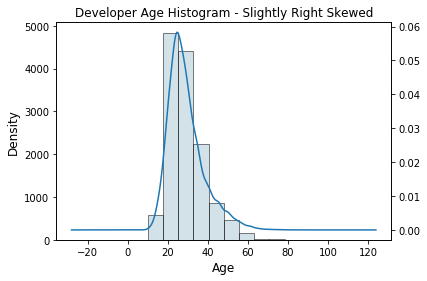

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3', 
                          edgecolor='black', 
                          grid=False,
                          alpha=0.5)
ax.set_title('Developer Age Histogram - Slightly Right Skewed', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

fcc_survey_df['Age'].plot.kde(ax=ax, secondary_y=True)

In [42]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


#### Fixed-width Binning - Custom Binning Scheme

In [43]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(
                                           np.array(
                                              fcc_survey_df['Age']), 
                                              bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(
                                           np.array(
                                              fcc_survey_df['Age']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)
# view the binned features 
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 
               'Age_bin_custom_range',   
               'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


#### Adaptive Binning (Qunatile)
The drawback in using fixed-width binning is that due to us manually deciding the bin ranges, we can end up with irregular bins which are not uniform based on the number of data points or values which fall in each bin. Some of the bins might be densely populated and some of them might be sparsely populated or even empty! Adaptive binning is a safer strategy in these scenarios where we let the data speak for itself! 

Popular examples of quantiles include:
- **`2-Quantile`** known as the **median** which divides the data distribution into two equal bins, 
- **`4-Quantiles`** known as the **quartiles** which divide the data into 4 equal bins and 
- **`10-Quantiles`** also known as the **deciles** which create 10 equal width bins.

Text(0, 0.5, 'Frequency')

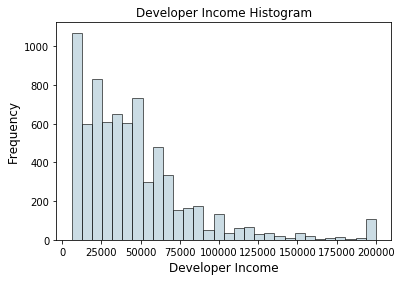

In [44]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, 
                             color='#A9C5D3', 
                             edgecolor='black', 
                             grid=False,
                             alpha=0.6
                            )
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [45]:
# calculate quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

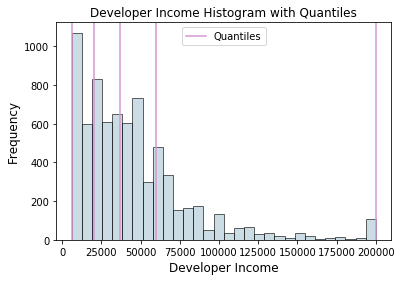

In [46]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, 
                             color='#A9C5D3', 
                             edgecolor='black', 
                             grid=False,
                             alpha=0.6)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='#D696D3')
    
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Developer Income Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [47]:
# quantile cut
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(
                                            fcc_survey_df['Income'], 
                                            q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(
                                            fcc_survey_df['Income'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_quantile_range', 
               'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


## <a name="section2.4"></a> $\Delta$ 2.4 - Log Transformations


In [48]:
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5, 450, '$\\mu$=10.43')

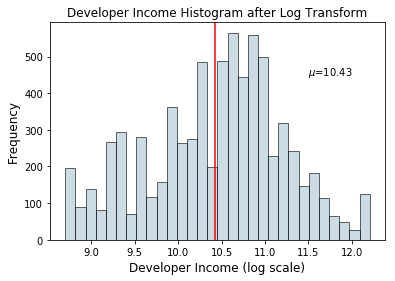

In [49]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, 
                                 color='#A9C5D3', 
                                 edgecolor='black', 
                                 grid=False,
                                 alpha=0.6)
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', 
             fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

---  

---  

---  

# <a name="section3"></a> <font color='#347B98'> 3. Feature Scaling 


#### What is feature scaling? 
Scaling of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

#### Importance of feature scaling ([reference](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html))
Feature scaling though standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

### Reference
- Comparing different scalers in sklearn ([link](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html))

In the following example, we will use the california housing data. In this dataset, feature 0 (median income in a block) and feature 5 (number of households) of the California housing dataset have very different scales and contain some very large outliers. These two characteristics lead to difficulties to visualize the data and, more importantly, they can degrade the predictive performance of many machine learning algorithms. Unscaled data can also slow down or even prevent the convergence of many gradient-based estimators.

## <a name='section3.1'></a>$\Delta$ 3.1 - Feature Scaling

In [50]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import Normalizer

from sklearn.datasets import fetch_california_housing

%matplotlib inline

def create_axes(title, figsize=(12, 4)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cm.plasma_r(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

def make_plot(transformer_name, feature, target):
    title, X, y = transformer_name, feature, target
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cm.plasma_r,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

In [51]:
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# We will only work with feature 0 and 5 since they have 
# very different scales

X_original = X_full[:, [0, 5]]

# scale the output between 0 and 1 for the colorbar
y_original = minmax_scale(y_full)

In [52]:
### Original Data

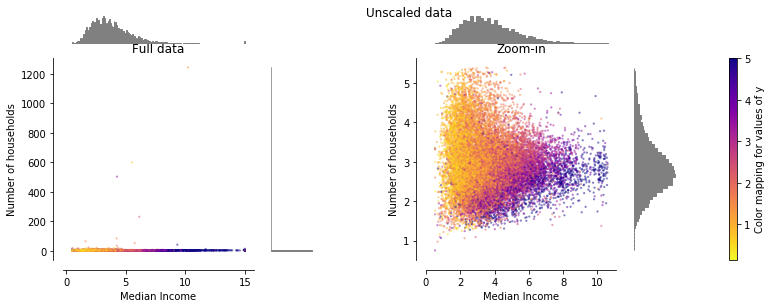

In [53]:
make_plot('Unscaled data', X_original, y_original)

In [54]:
### Standard Scaling

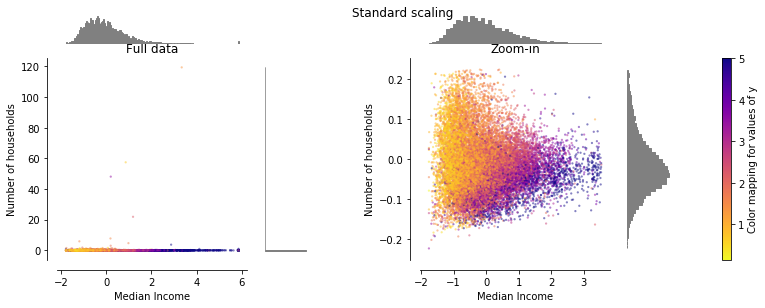

In [55]:
X_stdscale = StandardScaler().fit_transform(X_original)
make_plot('Standard scaling', X_stdscale, y_original)

In [56]:
### MinMax 

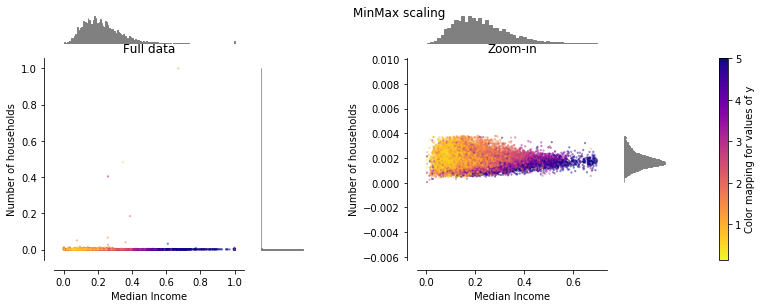

In [57]:
X_minmaxscale = MinMaxScaler().fit_transform(X_original)
make_plot('MinMax scaling', X_minmaxscale, y_original)

## <a name='section3.2'></a>$\Delta$  3.2 - Feature Scaling Impact on PCA

In this example, we play with the wine dataset for a classification problem. The purpose is to test if PCA will have a significant impact on the predictive accuracy. 

Raw code can be found here: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

randomState = 42

features, target = load_wine(return_X_y=True)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=randomState)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### <a name='section3.2.1'></a>$\delta$ 3.2.1 - PCA without Feature Scaling

In [59]:
# Fit to data and predict using pipelined LR and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), LogisticRegression())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the normal test dataset with PCA
74.07%



### <a name='section3.2.2'></a>$\delta$ 3.2.2 - PCA with Feature Scaling

In [60]:
# Fit to data and predict using pipelined scaling, LR and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
98.15%



### <a name='section3.2.3'></a>$\delta$ 3.2.3 Visual Explanation of the difference between scaling and no scaling for PCA


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


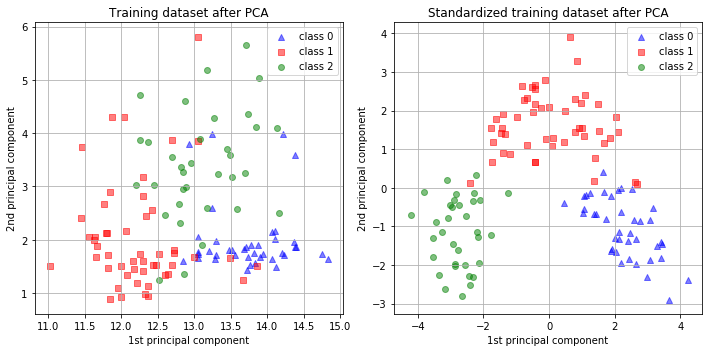

In [61]:
# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal componenets
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

# <a name="section4"></a> <font color='#347B98'> 4. Polynomials and Interaction Terms
- Supervised machine learning models usually try to model the output responses as a function of the input feature variables.
- While non-linear algorithms such as random forest handles non-linear interactions well, deep neural networks even build deep features that captures non-linearities (we will cover deep learing at the end of the course/bootcamp)
- However, linear models such as regression doesn't capture non-linearity in the data directly; so sometimes we need to build interaction features for the model.

<img src='https://chrisalbon.com/images/machine_learning_flashcards/Interaction_Term_print.png' width='40%'>

In [64]:
# Load the pokemon dataset
poke_df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/Pokemon.csv', encoding='utf-8') 
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [65]:
attack_defense = poke_df[['Attack', 'Defense']]
attack_defense.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [66]:
# We can use sklearn's PolynomialFeatures function to develop interaction terms
from sklearn.preprocessing import PolynomialFeatures
polyfeats = PolynomialFeatures(degree=2, 
                        interaction_only=False,  
                        include_bias=False) # setting interaction_only to False will allow polynomials terms 
poke_polyfeats = polyfeats.fit_transform(attack_defense)
poke_polyfeats

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [67]:
intr_features = pd.DataFrame(poke_polyfeats, columns=['Attack','Defense','Attack^2','Attack x Defense','Defense^2'])
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0
